<h1>Programming for Data Analysis Project 2022</h1>
<hr>

Author: Liliana Pereira

</h2>Project Description</h2>
<hr>

This project's goal is to simulate a real-world phenomena in order to produce a dataset. Instead of gathering data, I will model and synthesize data from a dataset using Python and Python-based tools.
<hr>

<h2>Context - About the dataset chosen</h2>
<hr>

Hospitals in California that perform a certain number of weight-loss surgeries.
The dataset includes statistics on five different types of bariatric (weight reduction) procedures carried out in California hospitals: open Roux-en-Y gastric bypass, laparoscopic Roux-en-Y gastric bypass, laparoscopic adjustable gastric banding, vertical sleeve gastrectomy, and biliopancreatic diversion. Due to coding changes from ICD-9-CM to ICD-10-CM/PCS, which took effect on October 1, 2015, the 2015 Data are given for January through September. Comparisons between years should be done with caution because results from prior years were based on 12 months of data whereas results from 2015 were based on 9 months of data. The surgeries carried out in outpatient settings are not included in this dataset.

<h2>Importing libraries</h2>

Here we are importing all the libraries required for the case study.

In [1]:
#!pip install -U seaborn
#!pip install -U scipy
#!pip install -U pandas

#conda install geopandas
#conda install -c conda-forge descartes

In [2]:
#Importing the requering libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
import seaborn as sns
import numpy as np
import scipy.stats as stats



#from scipy.stats import norm
#from sklearn.model_selection import train_test_split

First step is have the libraries imported. After these libraries have been imported, the data is imported. To obtain the iris dataset, I chose access the pandas library.

In [3]:
# Variable .
# od = obesity data

od = pd.read_csv("number-of-weight-loss-surgeries-performed-in-california-hospitals.csv")

In [4]:
# I renamed the column name for better understanding

od.rename(columns = {'# of Cases':'NCases'}, inplace = True)
od['NCases'] = od['NCases'].fillna(0)
od['NCases'] = od['NCases'].astype(int)

In [5]:
# Cheking the data. Printing the first 5 lines of data frame

od.head()

,Year,County,Hospital,OSHPDID,Surgery,NCases,Location 1
0,2006,Placer,Sutter Auburn Faith Hospital,106310791.0,LAPRYGB,37,"(38.94452, -121.0982)"
1,2009,Orange,Chapman Medical Center,106301140.0,VSG,6,"(33.78785, -117.82586)"
2,2011,Placer,Sutter Roseville Medical Center,106311000.0,LAPBAND,6,"(38.76439, -121.25055)"
3,2012,Los Angeles,Marina Del Rey Hospital,106190500.0,LAPBAND,35,"(33.98125, -118.43971)"
4,2012,San Mateo,Sequoia Hospital,106410891.0,VSG,6,"(37.48129, -122.25377)"


<h2>Understanding the Dataset</h2>

In [6]:
od.shape

(5400, 7)

A brief check confirms the dataset has 5400 rows and 7 columns.

Data dictionary for bariatric surgery

1. Year - Year of Discharge
2. County - County in which the hospital is located
3. Hospital - Name of Hospital Reporting
4. OSHPDID - A unique number established by the Office of Statewide Health Planning and Development (OSHPD) for identifying facilities and used in the Licensed Facility Information System (LFIS). The first three numbers identify the type of facility, the next two represent the county number, and the last five are randomly assigned within each county.
5. Surgery - Type of Weight Loss (Bariatric) Surgeries
6. NCases - Type of Weight Loss (Bariatric) Procedure Counts
7. Location 1 - Longitude of hospital location and Latitude of hospital location

<h2>Exploratory Data Analysis</h2>
<hr>

Here we will start analyzing the general data

In [7]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5400 non-null   int64  
 1   County      5345 non-null   object 
 2   Hospital    5400 non-null   object 
 3   OSHPDID     5345 non-null   float64
 4   Surgery     5400 non-null   object 
 5   NCases      5400 non-null   int32  
 6   Location 1  5345 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 274.3+ KB


Here we have 5.4k rows with 7 columns for each. It is composed of 2 float types, 1 int types and 4 object types.

In [8]:
od.isnull().sum()

Year           0
County        55
Hospital       0
OSHPDID       55
Surgery        0
NCases         0
Location 1    55
dtype: int64

So, we can see there are almost 2.4k null values in the # of Cases and Location 1 we have 55 and a very few null values in County and OSHPDID.

In [9]:
od.describe()

,Year,OSHPDID,NCases
count,5400.000000,5.345000e+03,5400.000000
mean,2010.132407,1.062773e+08,56.348148
std,3.222913,1.326982e+05,451.601395
min,2005.000000,1.060108e+08,0.000000
25%,2007.000000,1.061904e+08,0.000000
50%,2010.000000,1.063011e+08,1.000000
75%,2013.000000,1.063708e+08,19.000000
max,2015.000000,1.065641e+08,10511.000000


-> It is clear from this that there are 100.754967 cases on average.

-> The standard deviation of the cases is 600.204387.

In [10]:

# Insight about unique values
od.nunique()

Year           11
County         31
Hospital      177
OSHPDID       171
Surgery         8
NCases        358
Location 1    171
dtype: int64

In [11]:
# Making sure if any duplicatd values.
od.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

Observando o tipo de cirugia praticada nos hospitais 

In [12]:
od['Surgery'].unique()

array(['LAPRYGB', 'VSG', 'LAPBAND', 'OPENRYGB', 'BPD', 'LapBand',
       'LapRYGB', 'OpenRYGB'], dtype=object)

The result of this analysis was 8, where the same case sensitive surgery was detected for surgeries with the same name

In [13]:
od['Surgery'] = od['Surgery'].str.upper()

In [14]:
SurgeryUnique = od['Surgery'].nunique()
print(od['Surgery'].unique())
print(SurgeryUnique)

['LAPRYGB' 'VSG' 'LAPBAND' 'OPENRYGB' 'BPD']
5


In [15]:
LAPRYGB = od.loc[od['Surgery'] == 'LAPRYGB']

VSG = od.loc[od['Surgery'] == 'VSG']

LAPBAND = od.loc[od['Surgery'] == 'LAPBAND']

OPENRYGB = od.loc[od['Surgery'] == 'OPENRYGB']

BPD = od.loc[od['Surgery'] == 'BPD']

In [16]:
# First values of these data frames
LAPRYGB.head()

,Year,County,Hospital,OSHPDID,Surgery,NCases,Location 1
0,2006,Placer,Sutter Auburn Faith Hospital,106310791.0,LAPRYGB,37,"(38.94452, -121.0982)"
8,2005,Riverside,Southwest Healthcare System – Murrieta,106334068.0,LAPRYGB,464,"(33.55788, -117.18488)"
13,2005,NaN,STATEWIDE,NaN,LAPRYGB,10185,NaN
18,2006,NaN,STATEWIDE,NaN,LAPRYGB,10511,NaN
23,2007,NaN,STATEWIDE,NaN,LAPRYGB,9264,NaN


In [17]:
SurgerySum = od.groupby(['Surgery']).NCases.sum().reset_index()

In [18]:
SurgerySum

,Surgery,NCases
0,BPD,3688
1,LAPBAND,30252
2,LAPRYGB,174804
3,OPENRYGB,12214
4,VSG,83322


<AxesSubplot: >

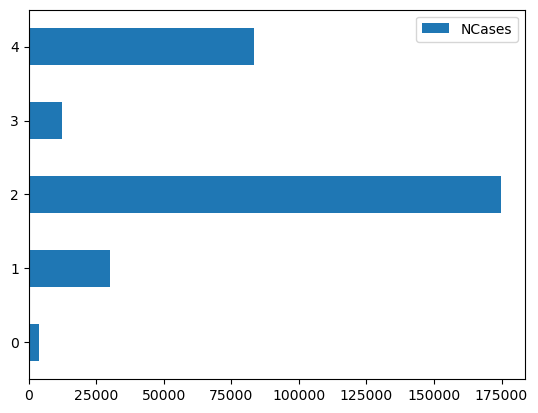

In [19]:
SurgerySum.plot(kind = 'barh')

In [20]:
HospitalSum = od.groupby(['Hospital']).NCases.sum().reset_index()

In [21]:
HospitalSum

,Hospital,NCases
0,Adventist Medical Center,0
1,Alta Bates Summit Medical Center,105
2,Alta Bates Summit Medical Center – Summit Camp...,1501
3,Alvarado Hospital,1021
4,Arrowhead Regional Medical Center,0
...,...,...
172,Valley Memorial Hospital,352
173,Valleycare Medical Center,1272
174,Ventura County Medical Center,167
175,Watsonville Community Hospital,9


# xxxx  One-Hot Encoding


ref https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

In [22]:
Surgery_dummies = pd.get_dummies(od.Surgery)

In [23]:
od = pd.concat([od, Surgery_dummies], axis=1)

In [24]:
od.head()

,Year,County,Hospital,OSHPDID,Surgery,NCases,Location 1,BPD,LAPBAND,LAPRYGB,OPENRYGB,VSG
0,2006,Placer,Sutter Auburn Faith Hospital,106310791.0,LAPRYGB,37,"(38.94452, -121.0982)",0,0,1,0,0
1,2009,Orange,Chapman Medical Center,106301140.0,VSG,6,"(33.78785, -117.82586)",0,0,0,0,1
2,2011,Placer,Sutter Roseville Medical Center,106311000.0,LAPBAND,6,"(38.76439, -121.25055)",0,1,0,0,0
3,2012,Los Angeles,Marina Del Rey Hospital,106190500.0,LAPBAND,35,"(33.98125, -118.43971)",0,1,0,0,0
4,2012,San Mateo,Sequoia Hospital,106410891.0,VSG,6,"(37.48129, -122.25377)",0,0,0,0,1


<h2>Data Analysis and Visualization</h2>

Surgery Type for Weight Loss (Bariatric) Surgeries

<AxesSubplot: xlabel='Year', ylabel='NCases'>

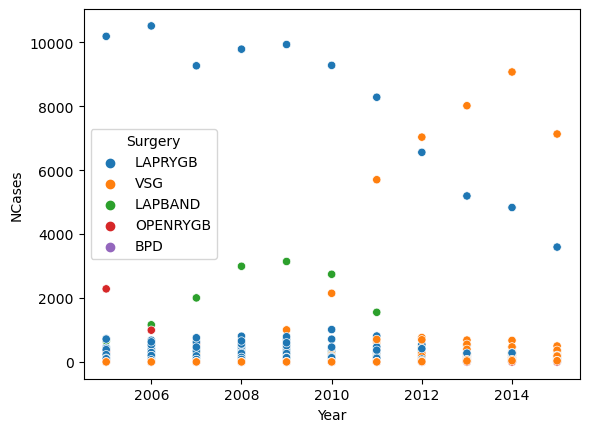

In [25]:
sns.scatterplot(x="Year", y="NCases", data=od, hue="Surgery")

<AxesSubplot: xlabel='Surgery', ylabel='NCases'>

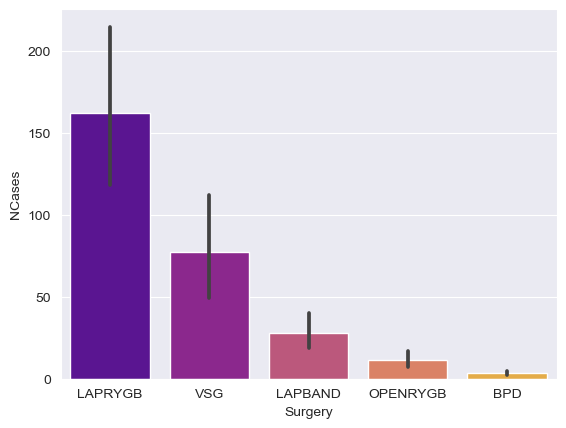

In [26]:
# set the background style of the plot
sns.set_style('darkgrid')
 
sns.barplot(x ='Surgery', y ='NCases', data = od, palette ='plasma') 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Placer'),
  Text(1, 0, 'Orange'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'San Mateo'),
  Text(4, 0, 'Riverside'),
  Text(5, 0, 'San Diego'),
  Text(6, 0, 'Alameda'),
  Text(7, 0, 'Butte'),
  Text(8, 0, 'Contra Costa'),
  Text(9, 0, 'Fresno'),
  Text(10, 0, 'Humboldt'),
  Text(11, 0, 'Kern'),
  Text(12, 0, 'Napa'),
  Text(13, 0, 'Santa Clara'),
  Text(14, 0, 'Madera'),
  Text(15, 0, 'Monterey'),
  Text(16, 0, 'Nevada'),
  Text(17, 0, 'Sacramento'),
  Text(18, 0, 'San Bernardino'),
  Text(19, 0, 'San Francisco'),
  Text(20, 0, 'Santa Barbara'),
  Text(21, 0, 'Shasta'),
  Text(22, 0, 'Sonoma'),
  Text(23, 0, 'Stanislaus'),
  Text(24, 0, 'Ventura'),
  Text(25, 0, 'Imperial'),
  Text(26, 0, 'Mendocino'),
  Text(27, 0, 'San Joaquin'),
  Text(28, 0, 'Tulare'),
  Text(29, 0, 'Santa Cruz'),
  Text(30, 0, 'Kings')])

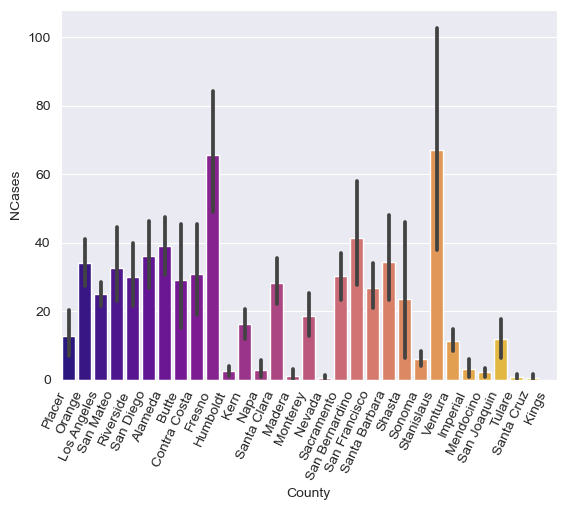

In [27]:
sns.barplot(x ='County', y ='NCases', data = od, palette ='plasma') 
plt.xticks(rotation=65, horizontalalignment='right')

In [28]:
## Using the pandas.groupby() method to produce a pivot table:
od_II = od.groupby(by=['County','BPD','LAPBAND','LAPRYGB','OPENRYGB','VSG']).Year.value_counts().sort_index()

In [29]:
od_II


County   BPD  LAPBAND  LAPRYGB  OPENRYGB  VSG  Year
Alameda  0    0        0        0         1    2005    3
                                               2006    3
                                               2007    3
                                               2008    3
                                               2009    4
                                                      ..
Ventura  1    0        0        0         0    2011    3
                                               2012    4
                                               2013    4
                                               2014    4
                                               2015    4
Name: Year, Length: 1325, dtype: int64

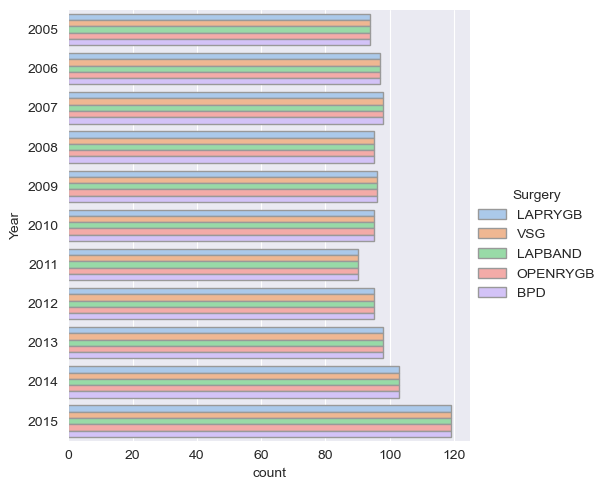

In [30]:
sns.catplot(
    data=od, y="Year", hue="Surgery", kind="count",
    palette="pastel", edgecolor=".6",
)

In [31]:
od['Hospital_encoded'] = LabelEncoder().fit_transform(od['Hospital'])
od[['Hospital', 'Hospital_encoded']] # special syntax to get just these two columns

,Hospital,Hospital_encoded
0,Sutter Auburn Faith Hospital,154
1,Chapman Medical Center,13
2,Sutter Roseville Medical Center,158
3,Marina Del Rey Hospital,85
4,Sequoia Hospital,142
...,...,...
5395,Ventura County Medical Center,174
5396,Ventura County Medical Center,174
5397,Ventura County Medical Center,174
5398,Ventura County Medical Center,174


In [32]:
od['County_encoded'] = LabelEncoder().fit_transform(od['County'])
od[['County', 'County_encoded']] # special syntax to get just these two columns

,County,County_encoded
0,Placer,15
1,Orange,14
2,Placer,15
3,Los Angeles,8
4,San Mateo,22
...,...,...
5395,Ventura,30
5396,Ventura,30
5397,Ventura,30
5398,Ventura,30


In [33]:
od['Surgery_encoded'] = LabelEncoder().fit_transform(od['Surgery'])
od[['Surgery', 'Surgery_encoded']] # special syntax to get just these two columns

,Surgery,Surgery_encoded
0,LAPRYGB,2
1,VSG,4
2,LAPBAND,1
3,LAPBAND,1
4,VSG,4
...,...,...
5395,BPD,0
5396,LAPBAND,1
5397,LAPRYGB,2
5398,OPENRYGB,3


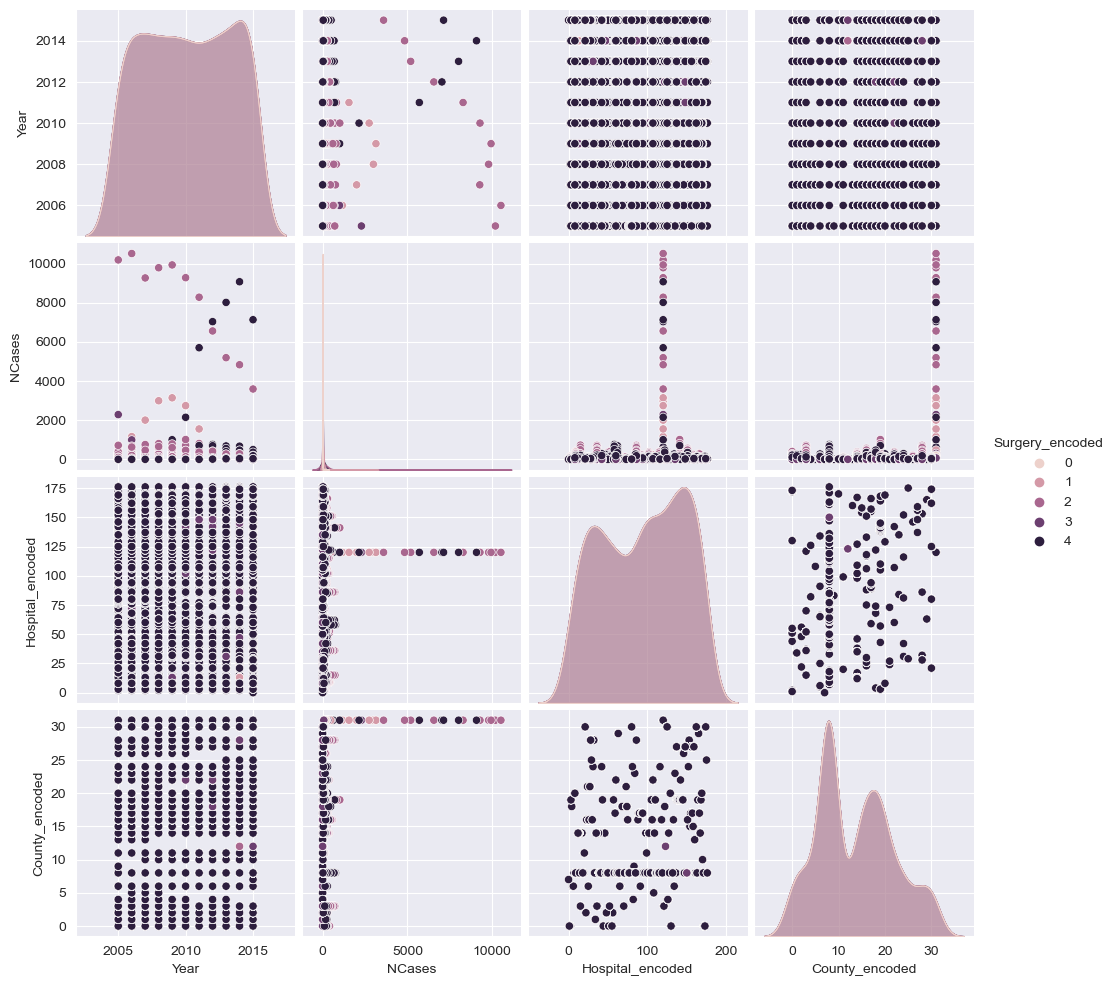

In [34]:
sns.pairplot(vars=["Year","NCases","Hospital_encoded", "County_encoded"], data=od, hue="Surgery_encoded")

It was important to include the Latitude and Longitude coordinates in distinct columns in order to do a location-based analysis. 

In [35]:
#od['Location 1'].str.strip('()')                               \
#                   .str.split(', ', expand=True)                   \
#                  .rename(columns={0:'Latitude', 1:'Longitude'}) 
#split_data = od['Location 1'].str.strip(')').str.strip('(').str.split(', ')
#od['lat'] = split_data.apply(lambda x: x[0])
#od['long'] = split_data.apply(lambda x: x[1])

od[['Latitude','Longitude']] = od['Location 1'].str.strip('()').str.split(",",expand=True,)



In [36]:
#split_Location

In [37]:
#frames = [od, split_Location]
  
#result = pd.concat(frames)
#display(result)

In [38]:
od.head()

,Year,County,Hospital,OSHPDID,Surgery,NCases,Location 1,BPD,LAPBAND,LAPRYGB,OPENRYGB,VSG,Hospital_encoded,County_encoded,Surgery_encoded,Latitude,Longitude
0,2006,Placer,Sutter Auburn Faith Hospital,106310791.0,LAPRYGB,37,"(38.94452, -121.0982)",0,0,1,0,0,154,15,2,38.94452,-121.0982
1,2009,Orange,Chapman Medical Center,106301140.0,VSG,6,"(33.78785, -117.82586)",0,0,0,0,1,13,14,4,33.78785,-117.82586
2,2011,Placer,Sutter Roseville Medical Center,106311000.0,LAPBAND,6,"(38.76439, -121.25055)",0,1,0,0,0,158,15,1,38.76439,-121.25055
3,2012,Los Angeles,Marina Del Rey Hospital,106190500.0,LAPBAND,35,"(33.98125, -118.43971)",0,1,0,0,0,85,8,1,33.98125,-118.43971
4,2012,San Mateo,Sequoia Hospital,106410891.0,VSG,6,"(37.48129, -122.25377)",0,0,0,0,1,142,22,4,37.48129,-122.25377


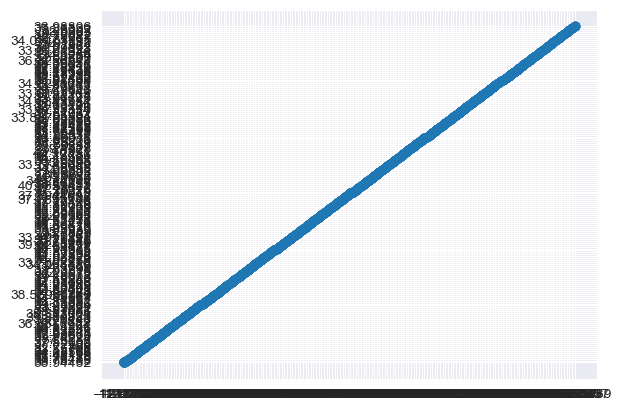

In [39]:
plt.scatter(x=od['Longitude'].astype(str), y=od['Latitude'].astype(str))
plt.show()

<h2>Plot data on a World Map</h2>

The data in the Pandas object needs to have location coordinates, which means latitude and longitude. 

NameError: name 'threshold' is not defined

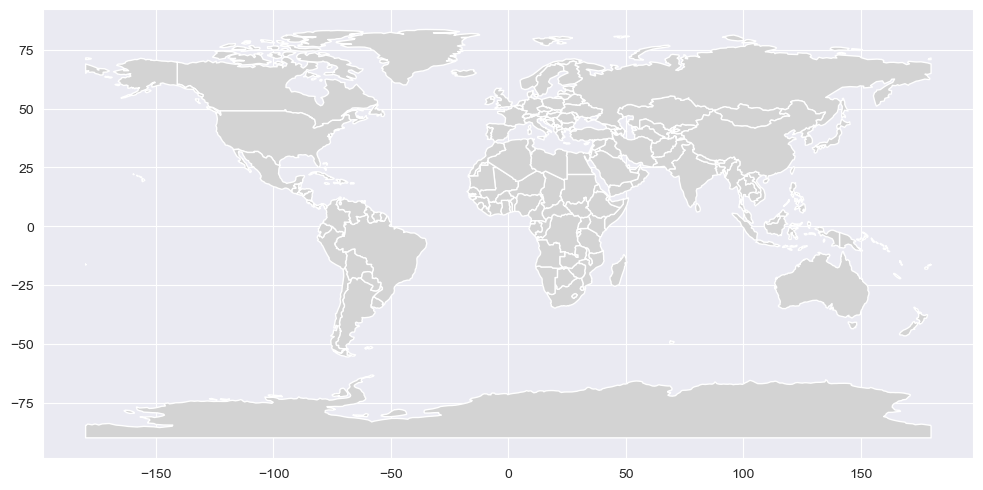

In [40]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = od['Longitude']
y = od['Latitude']
z = od['County']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            cmap='autumn')
plt.colorbar(label='County')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

first_year = df["Datetime"].min().strftime("%Y")
last_year = df["Datetime"].max().strftime("%Y")
plt.title("NASA: Fireballs Reported by Government Sensors\n" +     
          str(first_year) + " - " + str(last_year))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
usa = world[world.name == "United States of America"]

In [ ]:
world[world["name"] == "United States of America"].plot(color="lightgrey")

In [ ]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")
# plot points
df.plot(x="longitude", y="latitude", kind="scatter", 
        c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<h2>Conclusion </h2>
<hr>

In Progress

<h2>References</h2>
<hr>

The references below were all gathered in November 2022 and December 2022.

https://datasetsearch.research.google.com/

https://datasetsearch.research.google.com/search?src=0&query=bariatric%20surgery%20&docid=L2cvMTFzMHdjczY3bg%3D%3D

https://data.ca.gov/dataset/number-of-weight-loss-surgeries-performed-in-california-hospitals

https://data.world/datasets/obesity

https://chronicdata.cdc.gov/browse?category=Nutrition%2C+Physical+Activity%2C+and+Obesity

https://www.mdpi.com/1424-8220/20/9/2734/htm

https://stackoverflow.com/

https://pandas.pydata.org/

https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

https://favtutor.com/blogs/pandas-unique-values-in-column

https://stackoverflow.com/questions/39396678/adding-lat-lon-coordinates-to-separate-columns-python-dataframe

https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/

https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3

https://jcutrer.com/python/learn-geopandas-plotting-usmaps

https://deepnote.com/@iracistensjo/Geopandas-installation-guide-00272a08-4a13-479d-9970-25c4689b6da0

https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
by Aurélien Géron
Released September 2019
Publisher(s): O'Reilly Media, Inc.
ISBN: 9781492032649

Title: Think Stats, 2nd Edition: Exploratory Data Analysis in Python
Author(s) Allen B. Downey
Publisher: O'Reilly Media; 2 edition (November 7, 2014)
ISBN-10: 1491907339
ISBN-13: 978-149190733

Practical Statistics for Data Scientists, 2nd Edition
by Peter Bruce, Andrew Bruce, Peter Gedeck
Released May 2020
Publisher(s): O'Reilly Media, Inc.
ISBN: 9781492072942